Authenticating Colab with BigQuery

In [1]:
from google.colab import auth

In [2]:
auth.authenticate_user()

In [3]:
project_id = 'task-1'

In [4]:
from google.cloud import bigquery

In [5]:
client = bigquery.Client(project = project_id)

Accessing the Public Dataset

In [6]:
dataset_ref = client.dataset('new_york_mv_collisions', project = 'bigquery-public-data')

In [7]:
dataset = client.get_dataset(dataset_ref)

Identifying number of Tables in the Dataset

In [8]:
tables = list(client.list_tables(dataset))

In [9]:
for table in tables:
  print(table.table_id)

nypd_mv_collisions


In [10]:
table_ref = dataset_ref.table('nypd_mv_collisions')

In [11]:
table = client.get_table(table_ref)

In [12]:
table.schema

[SchemaField('borough', 'STRING', 'NULLABLE', '', ()),
 SchemaField('contributing_factor_vehicle_1', 'STRING', 'NULLABLE', '', ()),
 SchemaField('contributing_factor_vehicle_2', 'STRING', 'NULLABLE', '', ()),
 SchemaField('contributing_factor_vehicle_3', 'STRING', 'NULLABLE', '', ()),
 SchemaField('contributing_factor_vehicle_4', 'STRING', 'NULLABLE', '', ()),
 SchemaField('contributing_factor_vehicle_5', 'STRING', 'NULLABLE', '', ()),
 SchemaField('cross_street_name', 'STRING', 'NULLABLE', '', ()),
 SchemaField('timestamp', 'DATETIME', 'NULLABLE', '', ()),
 SchemaField('latitude', 'FLOAT', 'NULLABLE', '', ()),
 SchemaField('longitude', 'FLOAT', 'NULLABLE', '', ()),
 SchemaField('location', 'STRING', 'NULLABLE', '', ()),
 SchemaField('number_of_cyclist_injured', 'INTEGER', 'NULLABLE', '', ()),
 SchemaField('number_of_cyclist_killed', 'INTEGER', 'NULLABLE', '', ()),
 SchemaField('number_of_motorist_injured', 'INTEGER', 'NULLABLE', '', ()),
 SchemaField('number_of_motorist_killed', 'INTE

Exporting BigQuery Public Dataset 'NYPD MV Collisions' to a DataFrame

In [15]:
data = client.list_rows(table).to_dataframe()

In [16]:
data.to_csv('nypd_mv_collision.csv')

In [17]:
#Ref: https://youtu.be/fEetUikqFn8

Importing Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,None,Following Too Closely,Unspecified,None,None,None,None,2021-04-21 23:00:00,40.837610,-73.88106,"(40.83761, -73.88106)",0,0,1,0,0,0,1.0,0.0,None,CROSS BRONX EXPY,4409508,Sedan,Tractor Truck Diesel,None,None,None,NaN
1,None,Unspecified,Unspecified,None,None,None,LINDEN PLACE,2021-04-23 13:00:00,NaN,NaN,None,0,0,0,0,0,0,0.0,0.0,None,WHITESTONE EXPRESSWAY,4409805,Pick-up Truck,Tractor Truck Diesel,None,None,None,NaN
2,None,Failure to Keep Right,Driver Inattention/Distraction,None,None,None,NEEDHAM AVENUE,2021-05-04 15:30:00,NaN,NaN,None,0,0,0,0,0,0,0.0,0.0,None,EAST 222 STREET,4413655,Station Wagon/Sport Utility Vehicle,Ambulance,None,None,None,NaN
3,None,Driver Inattention/Distraction,Unspecified,None,None,None,None,2021-05-06 15:20:00,40.727030,-73.85392,"(40.72703, -73.85392)",0,0,0,0,0,0,1.0,0.0,None,QUEENS BOULEVARD,4414320,Sedan,E-Bike,None,None,None,NaN
4,None,Driver Inattention/Distraction,Unspecified,None,None,None,None,2021-05-07 08:20:00,40.707676,-73.92386,"(40.707676, -73.92386)",0,0,1,0,0,0,1.0,0.0,None,FLUSHING AVENUE,4414970,Sedan,E BIKE,None,None,None,NaN


Data Pre-Processing

In [47]:
data.isnull().sum().sort_values(ascending=True)

number_of_motorist_injured             0
number_of_pedestrians_injured          0
number_of_motorist_killed              0
number_of_cyclist_killed               0
number_of_cyclist_injured              0
unique_key                             0
number_of_pedestrians_killed           0
timestamp                              0
number_of_persons_injured             18
number_of_persons_killed              31
contributing_factor_vehicle_1       5424
vehicle_type_code1                 10376
longitude                         216393
location                          216393
latitude                          216393
contributing_factor_vehicle_2     270775
vehicle_type_code2                322963
on_street_name                    380678
borough                           574393
zip_code                          574659
cross_street_name                 670772
off_street_name                  1569302
contributing_factor_vehicle_3    1729729
vehicle_type_code_3              1733610
contributing_fac

In [49]:
'''As the number of missing values is less in contributing factor vehicle 1 compared to other factors, using this as main columns and dropping the remaining columns to make data simpler.'''


'As the number of missing values is less in contributing factor vehicle 1 compared to other factors, using this as main columns and dropping the remaining columns to make data simpler.'

In [50]:
data = data.rename(columns = {'contributing_factor_vehicle_1' : 'collision_factor'})

In [52]:
#Dropping the unnecessary columns such as contributing factor, street names, ehicle types as an accident can happen anywhere and by any means of transport depending on the reason i.e.collision factor.
cols = ['contributing_factor_vehicle_2', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4',  'contributing_factor_vehicle_5', 'cross_street_name', 'off_street_name', 'on_street_name', 'vehicle_type_code1', 'vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5']
data = data.drop(cols, axis=1)

In [67]:
#Copying the data 
c_data = data.copy()

In [74]:
#Dropping the missing information of number of people injured and killed as the number of missing value is very low compared to the size of dataset.
# data['number_of_persons_injured'].dropna(axis=0, inplace=True)
# data['number_of_persons_killed'].dropna(axis=0, inplace=True)
data = data[pd.notnull(data['number_of_persons_injured'])]
data = data[pd.notnull(data['number_of_persons_killed'])]

In [84]:
#As the place of accident cannot be determined due to the missing Borough values, dropping them
data = data[pd.notnull(data['borough'])]

In [87]:
#The reason behind accident is important to know so no reason to keep the missing values, hence removing the missing values from collision factor column
data = data[pd.notnull(data['collision_factor'])]

In [77]:
#Converting the timestamp data type
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [78]:
#Splitting the timestamp
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

In [96]:
#Identifying the frequency of unique collision factor in the dataset
data['collision_factor'].value_counts()

Unspecified                       499229
Driver Inattention/Distraction    238130
Failure to Yield Right-of-Way      79859
Backing Unsafely                   54985
Other Vehicular                    42019
                                   ...  
Shoulders Defective/Improper          51
Windshield Inadequate                 48
Texting                               22
Listening/Using Headphones            10
1                                      8
Name: collision_factor, Length: 61, dtype: int64

In [97]:
#There are a majority of 'Unspecified' factor which is not leading anywhere so removing the unspecified factor for accidient.
data = data.drop(data[data['collision_factor'] == 'Unspecified'].index)

In [98]:
data.isnull().sum().sort_values(ascending=True)

borough                              0
month                                0
year                                 0
unique_key                           0
number_of_persons_killed             0
number_of_persons_injured            0
number_of_pedestrians_killed         0
number_of_pedestrians_injured        0
day                                  0
number_of_motorist_killed            0
number_of_cyclist_killed             0
number_of_cyclist_injured            0
timestamp                            0
collision_factor                     0
number_of_motorist_injured           0
hour                                 0
zip_code                           189
location                         25156
longitude                        25156
latitude                         25156
dtype: int64

In [91]:
#There are many missing location specific values, so before dealing with them, analysing the dataset

In [127]:
#n = data.groupby(['borough', 'collision_factor']).agg(count = ('collision_factor', 'sum'))

In [99]:
#Adding a column count to count the specific collision factor to be used for grouping 
data['count'] = 1

In [103]:
n = data.groupby(['borough', 'collision_factor']).agg({'count':sum})
n_data = n['count'].groupby(level=0, group_keys=False)

Text(0, 0.5, 'Count')

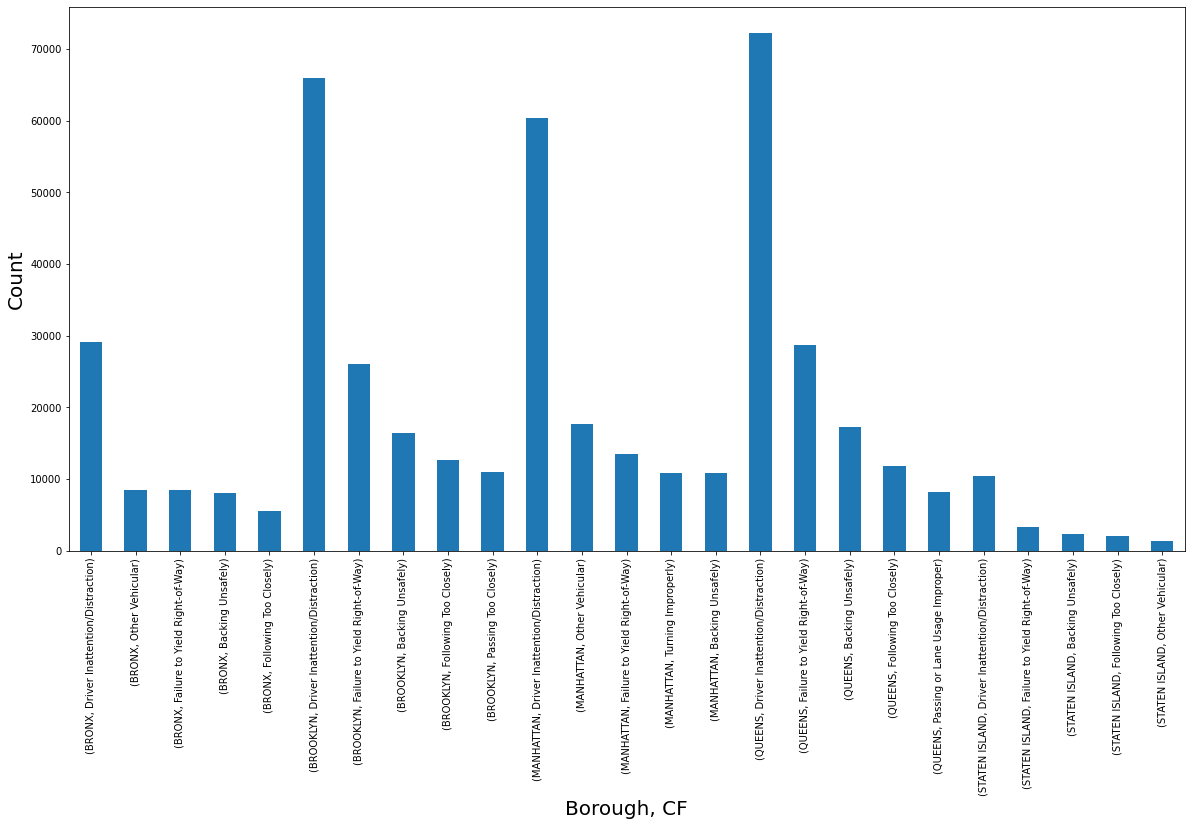

In [146]:
plt.figure(figsize=(20,10))
n_data.nlargest(5).plot.bar()
plt.xlabel('Borough, CF' , size=20)
plt.ylabel('Count', size=20)

In [149]:
'''With the above plot, we can determine that the Boroughs 'Queens', 'Brooklyn', and 'Manhatten' witnessed maximum number of motor vehicle collisions where the accidents with majority collision factor was 'Driver's inattention/distraction'.
A better plot would have resulted in coloured bar plots with Borough as x axis and top 5 collision factors as hue. '''

"With the above plot, we can determine that the Boroughs 'Queens', 'Brooklyn', and 'Manhatten' witnessed maximum number of motor vehicle collisions where the accidents with majority collision factor was 'Driver's inattention/distraction'.\nA better plot would have resulted in coloured bar plots with Borough as x axis and top 5 collision factors as hue. "

In [150]:
'''Since our focus is to analyse the dataset to help the city council reduce the accidents in the city of Brooklyn, extracting the data only for Brooklyn'''

'Since our focus is to analyse the dataset to help the city council reduce the accidents in the city of Brooklyn, extracting the data only for Brooklyn'

In [154]:
data.to_csv('clean_ny_mv_collision.csv')

This part can also be done using SQL on BigQuery:

SELECT unique_key, borough, timestamp, location, zip_code, latitude, longitude,
 contributing_factor_vehicle_1 AS collision_factor, number_of_cyclist_injured, number_of_cyclist_killed, 
 number_of_motorist_injured, number_of_motorist_killed, number_of_pedestrians_injured,  
 number_of_pedestrians_killed, number_of_persons_injured, number_of_persons_killed

FROM `bigquery-public-data.new_york.nypd_mv_collisions` 

WHERE borough LIKE "BROOKLYN" AND borough IS NOT NULL;

and then pass that table to pre-process and visualise using Python and Tableau.

In [159]:
brooklyn = data[data['borough'] == 'BROOKLYN']

In [161]:
brooklyn.head()

,borough,collision_factor,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code,year,month,day,hour,count
42133,BROOKLYN,Failure to Yield Right-of-Way,2021-04-14 18:55:00,40.642002,-73.898834,"(40.642002, -73.898834)",0,0,1,0,0,0,1.0,0.0,4407405,11236,2021,4,14,18,1
42134,BROOKLYN,Other Vehicular,2021-04-24 09:50:00,40.676495,-73.913704,"(40.676495, -73.913704)",0,0,0,0,0,0,0.0,0.0,4410076,11233,2021,4,24,9,1
42135,BROOKLYN,Driver Inattention/Distraction,2021-05-05 18:10:00,40.676548,-73.963540,"(40.676548, -73.96354)",1,0,0,0,0,0,1.0,0.0,4414100,11238,2021,5,5,18,1
42136,BROOKLYN,Traffic Control Disregarded,2021-05-31 18:08:00,40.673275,-73.868530,"(40.673275, -73.86853)",0,0,1,0,0,0,1.0,0.0,4422459,11208,2021,5,31,18,1
42137,BROOKLYN,Traffic Control Disregarded,2021-06-10 03:47:00,40.670986,-73.984795,"(40.670986, -73.984795)",0,0,0,0,0,0,0.0,0.0,4425639,11215,2021,6,10,3,1


In [163]:
#Saving brooklyn dataset
brooklyn.to_csv('brooklyn_mv_collision.csv', index=False)

Continue to Brooklyn Analysis.ipynb for the exploratory data analysis of the data and the recommendations for improvement to reduce accidents.

In [193]:
# col_ref = client.dataset('nypd', project = project_id)
# col_dataset = client.get_dataset(col_ref)
# tables = list(client.list_tables(col_dataset))
# for table in tables:
#   print(table.table_id)
# table_ref1 = dataset_ref.table('collision_frequency')
# table = client.get_table(table_ref1)
# table.schema
# cf_data = client.list_rows(table).to_dataframe()

In [194]:
#Since there is location issue with the above BigQuery Scraping, trying the raw way using Python.